**Dimensionality Reduction**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [3]:
X = mnist.data.astype('float32').to_numpy() # 0 ~ 255
X /= 255.0 # 0 ~ 1

y = mnist.target.to_numpy()

In [4]:
# mini MNIST
def mini_MNIST(size=10):
  idx_ = []
  for v in range(10):
    idx = np.where(y==str(v))[0].tolist()
    idx_+= np.random.choice(idx, size=size, replace=False).tolist()
  return X[idx_, ], y[idx_]

mini_X, mini_y = mini_MNIST(size=300)
print(mini_X.shape, mini_y.shape)

(3000, 784) (3000,)


**PCA**

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(mini_X)
print(pca_X.shape)

(3000, 2)


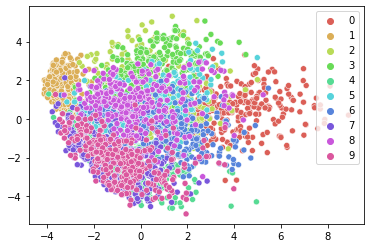

In [6]:
sns.scatterplot(x=pca_X[:,0], y=pca_X[:,1],
                hue=mini_y,
                palette=sns.hls_palette(10),
                legend='full')

In [7]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_X = mds.fit_transform(mini_X)
print(mds_X.shape)

(3000, 2)


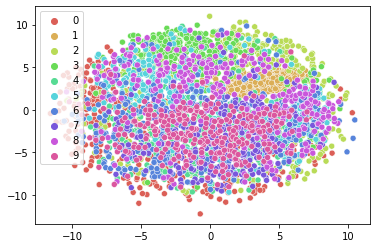

In [8]:
sns.scatterplot(x=mds_X[:,0], y=mds_X[:,1],
                hue=mini_y,
                palette=sns.hls_palette(10),
                legend='full')

**ISOMAP**

In [9]:
from sklearn.manifold import Isomap
im = Isomap(n_components=2)
im_X = im.fit_transform(mini_X)
print(im_X.shape)

(3000, 2)


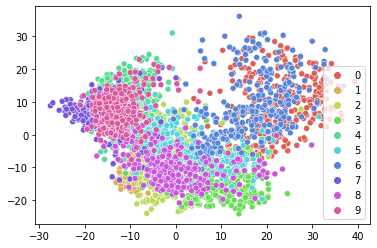

In [10]:
sns.scatterplot(x=im_X[:,0], y=im_X[:,1],
                hue=mini_y,
                palette=sns.hls_palette(10),
                legend='full')

**LLE**

In [11]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle = LLE(n_components=2)
lle_X = lle.fit_transform(mini_X)
print(lle_X.shape)

(3000, 2)


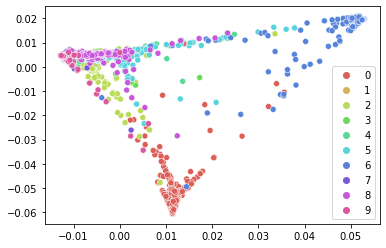

In [12]:
sns.scatterplot(x=lle_X[:,0], y=lle_X[:,1],
                hue=mini_y,
                palette=sns.hls_palette(10),
                legend='full')

**T-SNE**

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_X = tsne.fit_transform(mini_X)
print(tsne_X.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(3000, 2)


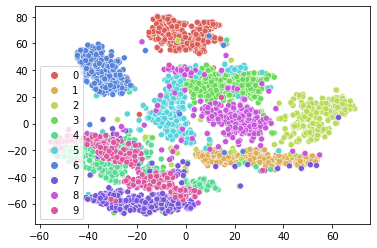

In [14]:
sns.scatterplot(x=tsne_X[:,0], y=tsne_X[:,1],
                hue=mini_y,
                palette=sns.hls_palette(10),
                legend='full')